In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Example of the linear congruent method

The performance of the linear congruent method (LCM) depends on the set values of $a$, $c$, and $M$.  Here we set the parameters to "bad" values.

In [3]:
nrandom=10
x=np.zeros(nrandom,dtype=np.int32)
M=np.int32(256)
c=np.int32(877)
a=np.int32(567859)

In [4]:
x[0]=15
for indx in np.arange(nrandom-1):
    x[indx+1]=(x[indx] * a + c) % M
    print(x[indx+1])

106
139
30
103
242
163
230
63
250


Doesn't seem bad.  Let's now generate 10,000 randoms.  Yes, these will repeat, but that's not the only problem.

In [5]:
nrandom = 10000
x=np.zeros(nrandom,dtype=np.int32)
x[0]=15
for indx in np.arange(nrandom-1):
    x[indx+1]=(x[indx] * a + c) % M
x=np.float32(x)/M

In [6]:
xmin=0.
xmax=1.
nbin=30

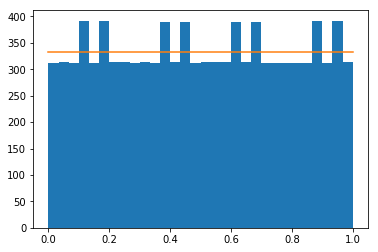

In [7]:
n, bins, patches=plt.hist(x,bins=nbin,range=(xmin,xmax))
plt.plot(np.arange(0,1.01,0.01),np.ones(101)*np.float32(nrandom)/nbin)
plt.show()

The distribution does look uniform, but with many deviates from that.  When you plot the points, they appear clumped together.

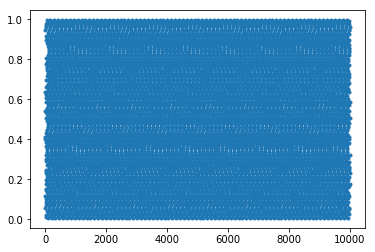

In [8]:
plt.plot(x, '.')

When you compare one number to its neighbor, there is a very definite pattern.  Not random at all.

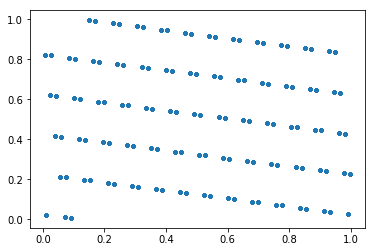

In [9]:
plt.plot(x[0:-1], x[1:], '.')

Now we use the numbers quoted in Eqs. 4.11 and 4.12 in Landau.

In [10]:
M = np.int64(2**48)
# "0o" is the prefix for a base-8 number in Python
c = np.int64(0o13)
a = np.int64(0o273673163155)

In [49]:
nrandom = 10000
x = np.zeros(nrandom, dtype=np.int64)
x[0] = 15
for indx in np.arange(nrandom - 1):
    x[indx + 1] = (x[indx] * a + c) % M
x = np.float64(x) / np.float64(M)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in long_scalars
  """


In [50]:
xmin = 0.
xmax = 1.
nbin = 30

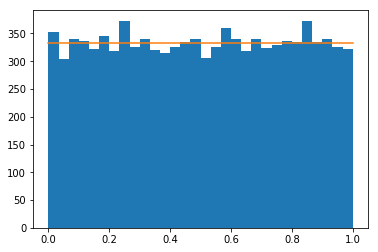

In [51]:
n, bins, patches=plt.hist(x,bins=nbin,range=(xmin,xmax))
plt.plot(np.arange(0,1.01,0.01),np.ones(101)*np.float32(nrandom)/nbin)
plt.show()

Now the points no longer clump together.

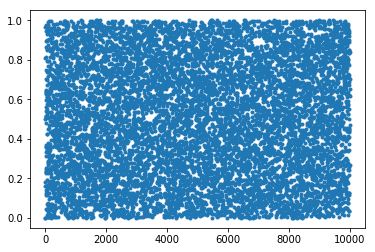

In [14]:
plt.plot(x, '.')

# Assessing randomness by looking at the variance in bins

We can assess randomness by using an ensemble of 1000 random samples.

In [53]:
nensembles = 1000
nper = 5000 #number of points per ensemble

In [54]:
x = np.zeros((nensembles, nper), dtype=np.int64)
xseed = 15
for iensemble in np.arange(nensembles):
    x[iensemble, 0] = xseed
    for indx in np.arange(nper - 1):
        x[iensemble, indx + 1] = (x[iensemble, indx] * a + c) % M
    xseed = x[iensemble, nper - 1] #set seed for next ensemble
x = np.float64(x) / np.float64(M)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in long_scalars
  


Now we construct the histogram for each ensemble, then we compute the mean and standard deviation for each bin across the ensembles.

In [58]:
xmin = 0.
xmax = 1.
nbin = 30

x_histogram = np.zeros((nensembles, nbin), dtype=np.int32)
for iensemble in np.arange(nensembles):
    x_histogram_tmp, x_edges = np.histogram(x[iensemble, :],
                                            range=[xmin, xmax], bins=nbin)
    x_histogram[iensemble, :] = x_histogram_tmp

In [59]:
x_means = np.mean(x_histogram, axis=0)
x_stds = np.std(x_histogram, axis=0)

In [60]:
x_means

array([165.969, 166.625, 166.712, 166.91 , 167.124, 166.622, 166.744,
       165.994, 166.409, 167.013, 167.215, 166.995, 167.037, 166.106,
       167.058, 166.805, 167.092, 166.554, 166.393, 166.536, 166.835,
       166.834, 166.638, 166.155, 167.114, 166.374, 166.265, 166.463,
       166.603, 166.806])

In [62]:
x_stds

array([12.25659166, 12.75705197, 13.09897156, 12.19220653, 12.88971   ,
       13.0201811 , 12.20575536, 13.01668022, 11.93011815, 12.39390298,
       12.60740953, 12.88553356, 13.16121693, 12.50291022, 12.560917  ,
       12.86020898, 12.38989653, 13.05768295, 12.87006414, 12.60589957,
       12.44410603, 12.72951075, 13.3811418 , 12.63309048, 12.45291147,
       12.29984244, 12.74985392, 12.62389128, 13.02625775, 13.02560417])

Now we can plot these values along with their expected values.

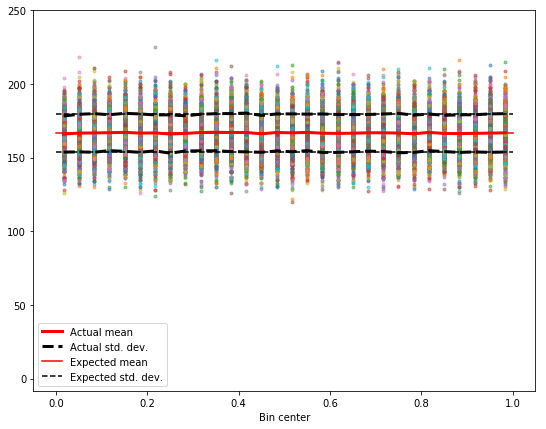

In [61]:
plt.figure(figsize=(9,7))

nexpected = np.float32(nper) / np.float32(nbin)

for iensemble in np.arange(nensembles):
    x_centers = xmin + (xmax - xmin) * (np.arange(nbin) + 0.5) / np.float32(nbin)
    plt.plot(x_centers, x_histogram[iensemble, :], '.', alpha=0.5)
    
plt.plot(x_centers, x_means, color='red', linewidth=3, label='Actual mean')
plt.plot(x_centers, x_means + x_stds, color='black', linestyle='dashed',
         linewidth=3, label='Actual std. dev.')
plt.plot(x_centers, x_means - x_stds, color='black', linestyle='dashed',
         linewidth=3)

plt.plot([0., 1.], np.ones(2) * nexpected, color='red', label='Expected mean')
plt.plot([0., 1.], np.ones(2) * (nexpected + np.sqrt(nexpected)),
         linestyle='dashed', color='black', label='Expected std. dev.')
plt.plot([0., 1.], np.ones(2) * (nexpected - np.sqrt(nexpected)),
         linestyle='dashed', color='black')

plt.ylim(np.array([-0.05, 1.5]) * nexpected)
plt.xlabel('Bin center')
plt.legend(loc=3)

The actual and expected values appear to match, but to be sure we should consider how close the actual and expected means should be.

How close should they be?  The fractional standard deviation for each ensemble is $1/\sqrt{N_{\rm exp}}$, such that the error on the mean would be $1/\sqrt{N_{\rm exp}N_{\rm ensemble}}$.

0.0024494897054069317


Text(0.5,0,'Bin center')

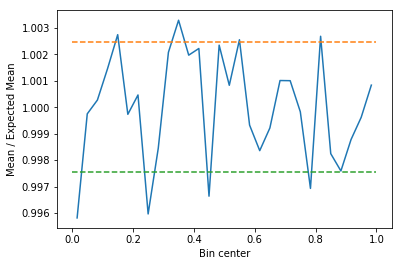

In [63]:
sdev = np.sqrt(1. / (nexpected * nensembles))
print sdev
plt.plot(x_centers, x_means / nexpected)
plt.plot(np.array([0,1]),np.ones(2)*(1+sdev),linestyle='--')
plt.plot(np.array([0,1]),np.ones(2)*(1-sdev),linestyle='--')
plt.ylabel('Mean / Expected Mean')
plt.xlabel('Bin center')

# Assessing randomness by looking at correlations

We can evaluate the correlations within each ensemble to test randomness.

In [64]:
nk = 100
C = np.zeros((nensembles, nk), dtype=np.float64)
for iensemble in np.arange(nensembles):
    for k in np.arange(nk):
        C[iensemble, k] = (x[iensemble, 0: nper - (k + 1)] *
                           x[iensemble, (k + 1): nper]).sum() / np.float32(nper - k)

The following box just computes the correlations for the first half.

In [65]:
nk = 100
Chalf = np.zeros((nensembles, nk), dtype=np.float64)
for iensemble in np.arange(nensembles):
    for k in np.arange(nk):
        # Note "//" is an integer division
        Chalf[iensemble, k] = (x[iensemble, 0: nper // 2 - (k + 1)] *
                               x[iensemble, (k + 1): nper // 2]).sum() / np.float32(nper // 2 - k)

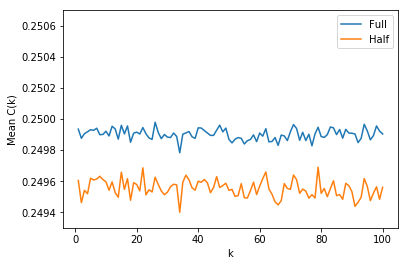

In [66]:
plt.plot(np.arange(nk) + 1, C.mean(axis=0), label='Full')
plt.plot(np.arange(nk) + 1, Chalf.mean(axis=0), label='Half')
plt.xlabel('k')
plt.ylabel('Mean C(k)')
plt.ylim((0.2493, 0.2507))
plt.legend()

Now let's test the behavior of the standard deviation.

In [67]:
Cstd = np.sqrt(((C - 0.25)**2).sum(axis=0) / C.shape[0])
Chalfstd = np.sqrt(((Chalf - 0.25)**2).sum(axis=0) / C.shape[0])

In [68]:
print Cstd

[0.00435037 0.0043497  0.00434065 0.00431504 0.00435596 0.00432561
 0.0042959  0.00438164 0.00432765 0.00435952 0.00433036 0.00426451
 0.00436534 0.00434378 0.00435125 0.00432717 0.00437231 0.00433638
 0.004349   0.0043519  0.00429554 0.00436396 0.00439732 0.00431411
 0.00436428 0.00434701 0.00438116 0.00440761 0.00436435 0.00430161
 0.00439695 0.00431919 0.00436752 0.00437732 0.00428844 0.00432007
 0.00440413 0.00432359 0.00434117 0.00434601 0.00429603 0.0043388
 0.0043334  0.00433558 0.00432364 0.00436218 0.00434069 0.00428371
 0.00438137 0.00435463 0.00437079 0.00428725 0.00429172 0.00433519
 0.0043824  0.00428816 0.00426107 0.00433648 0.00432577 0.0043402
 0.00425294 0.00441483 0.00433264 0.00437259 0.00438831 0.00432684
 0.00441231 0.00440081 0.00436125 0.00437792 0.00430153 0.00442391
 0.0043048  0.00430036 0.00441916 0.00434713 0.00436968 0.00437873
 0.00436651 0.00435378 0.00427708 0.00436101 0.00440372 0.00428612
 0.00432786 0.00438658 0.00430361 0.00434701 0.0043265  0.004351

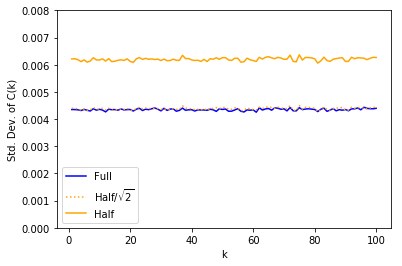

In [69]:
plt.plot(np.arange(nk) + 1, Cstd, color='blue', label='Full')
plt.plot(np.arange(nk) + 1, Chalfstd / np.sqrt(2.), color='orange',
         linestyle='dotted', label='Half/$\sqrt{2}$')
plt.plot(np.arange(nk) + 1, Chalfstd, color='orange', label='Half')
plt.xlabel('k')
plt.ylabel('Std. Dev. of C(k)')
plt.ylim(0., 0.008)
plt.legend()

Dotted, orange line = solid, blue line means that the halving the number of points increased the error by $\sqrt{2}$ as expected.


# Non-uniform Random Distributions

Let's generate the exponential distribution.

In [78]:
r = np.random.random(size=100000) # generate uniform deviates
x = - np.log(r) # transform to exponential deviates

Text(0.5,0,'x')

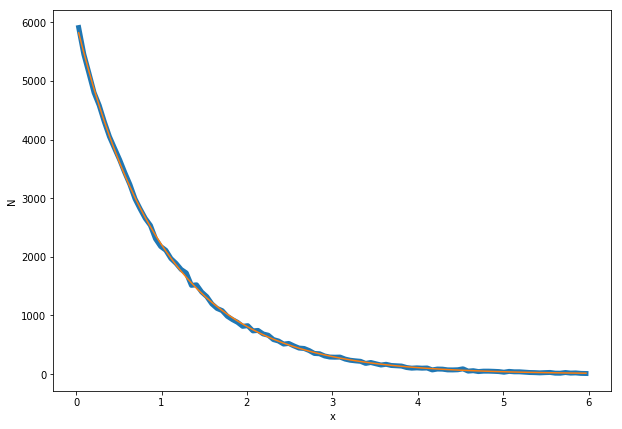

In [79]:
nbins = 100
dist, edges = np.histogram(x, bins=nbins, range=[0., 6.])
cens = 0.5 * (edges[:-1] + edges[1:])
plt.figure(figsize=(10, 7))
plt.plot(cens, dist, linewidth=5)
binsize = 6. / np.float32(nbins)
plt.plot(cens, len(x) * np.exp(- cens) * binsize)
plt.ylabel('N')
plt.xlabel('x')

Now the Gaussian distribution.

In [80]:
r1 = np.random.random(size=100000) # generate uniform deviates
r2 = np.random.random(size=100000)
x1 = np.sqrt(-2* np.log(r1))*np.cos(2*np.pi*r2) # transform to Gaussian deviates (no need to generate x2)

Text(0.5,0,'x')

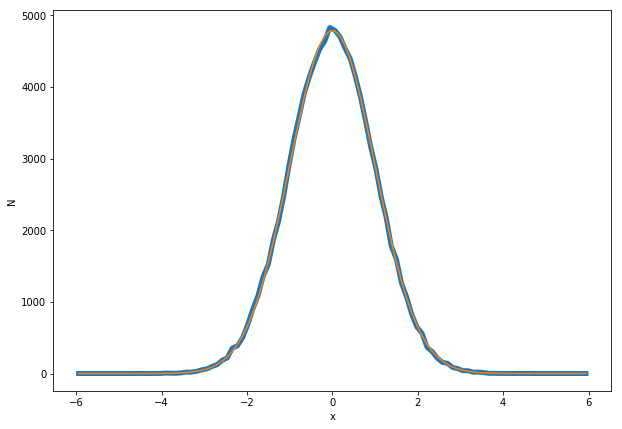

In [83]:
nbins = 100
dist, edges = np.histogram(x1, bins=nbins, range=[-6, 6.])
cens = 0.5 * (edges[:-1] + edges[1:])
plt.figure(figsize=(10, 7))
plt.plot(cens, dist, linewidth=5)
binsize = 12. / np.float32(nbins)
plt.plot(cens, len(x1) * np.exp(- cens**2/2.)/np.sqrt(2*np.pi) * binsize)
plt.ylabel('N')
plt.xlabel('x')

# The Random Walk

We let 1000 (collisionless) zombies loose in a (very long) corridor.  Where do they go?  First we set the steps.

In [72]:
nzombies = 1000
nsteps = 10000
steps = np.random.random(size=(nzombies, nsteps)) - 0.5 #uniform distribution

Here's the distribution for all the steps.

(0.0, 110000.0)

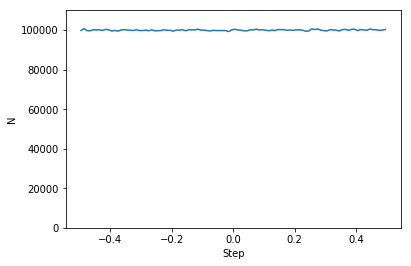

In [73]:
nbins = 100
steps_histogram, steps_edges = np.histogram(steps, bins=nbins, range=[-0.5, 0.5])
steps_centers = (steps_edges[0:nbins] + steps_edges[1:nbins + 1]) * 0.5
plt.plot(steps_centers, steps_histogram)
plt.xlabel('Step')
plt.ylabel('N')
plt.ylim((0., 110000.))

Now we take each zombie's steps and make a path for each zombie.  See how they spread out.

Text(0,0.5,'x')

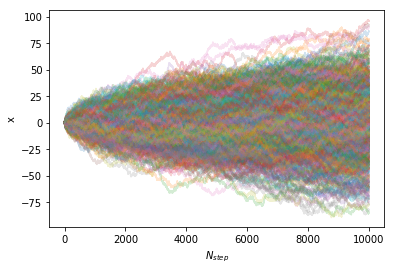

In [74]:
paths = steps.cumsum(axis=1)
for indx in np.arange(nwalkers):
    plt.plot(paths[indx, :], alpha=0.2)
plt.xlabel('$N_{step}$')
plt.ylabel('x')

Here we show the distribution at various numbers of steps.

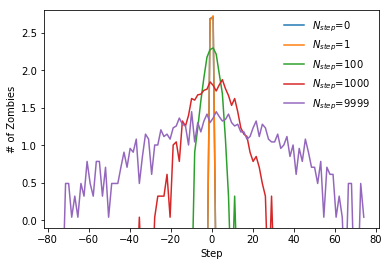

In [75]:
nbins = 100
dist0, edges = np.histogram(paths[:, 0], bins=nbins, range=[-75., 75])
dist1, edges = np.histogram(paths[:, 1], bins=nbins, range=[-75., 75])
dist10, edges = np.histogram(paths[:, 10], bins=nbins, range=[-75., 75])
dist100, edges = np.histogram(paths[:, 100], bins=nbins, range=[-75., 75])
dist1000, edges = np.histogram(paths[:, 1000], bins=nbins, range=[-75., 75])
dist9999, edges = np.histogram(paths[:, 9999], bins=nbins, range=[-75., 75])
cens = 0.5 * (edges[:-1] + edges[1:])
plt.plot(cens, np.log10(dist0 + 0.1),label='$N_{step}$=0')
plt.plot(cens, np.log10(dist1 + 0.1),label='$N_{step}$=1')
plt.plot(cens, np.log10(dist100 + 0.1),label='$N_{step}$=100')
plt.plot(cens, np.log10(dist1000 + 0.1),label='$N_{step}$=1000')
plt.plot(cens, np.log10(dist9999 + 0.1),label='$N_{step}$=9999')
plt.ylim((-0.1, 2.8))
plt.xlabel('Step')
plt.ylabel('# of Zombies')
plt.legend(loc='upper right',frameon=False)

We see that the standard deviation of the distribution grows as $\sqrt{N_{step}}$ as we would expect.

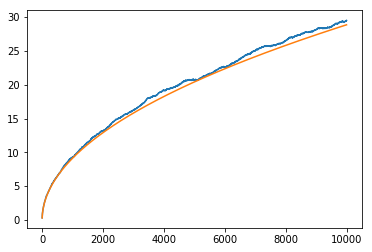

In [76]:
stds = np.std(paths, axis=0)
expected = np.sqrt(1. / 12. * (np.arange(nsteps) + 1))
plt.plot(stds)
plt.plot(expected)

Using these standard deviations values, the distributions are actually Gaussian.

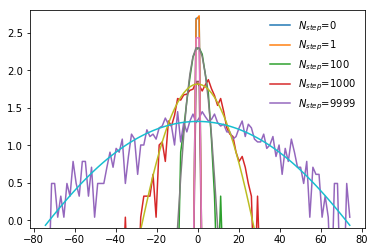

In [77]:
def model(indx):
    binsize = 150. / np.float32(nbins)
    model = (np.float32(nwalkers) *
             np.exp(- 0.5 * (cens / expected[indx])**2) /
             (np.sqrt(2. * np.pi) * expected[indx]) *
             binsize)
    return(model)

plt.plot(cens, np.log10(dist0 + 0.1),label='$N_{step}$=0')
plt.plot(cens, np.log10(dist1 + 0.1),label='$N_{step}$=1')
plt.plot(cens, np.log10(dist100 + 0.1),label='$N_{step}$=100')
plt.plot(cens, np.log10(dist1000 + 0.1),label='$N_{step}$=1000')
plt.plot(cens, np.log10(dist9999 + 0.1),label='$N_{step}$=9999')
plt.plot(cens, np.log10(model(0) + 0.1))
plt.plot(cens, np.log10(model(1) + 0.1))
plt.plot(cens, np.log10(model(100) + 0.1))
plt.plot(cens, np.log10(model(1000) + 0.1))
plt.plot(cens, np.log10(model(9999) + 0.1))
plt.ylim((-0.1, 2.8))
plt.legend(loc='upper right',frameon=False)